In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
data = pd.read_csv("Customer_seg.csv")

In [4]:
data.head()

,Unnamed: 0,review,polarity,division
0,3870,able play youtube alexa,0.5000,positive
1,62,able recognize indian accent really well drop ...,0.2794,positive
2,487,absolute smart device amazon connect external ...,0.1827,positive
3,3204,absolutely amaze new member family control hom...,0.3682,positive
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive


In [5]:
data = data.drop(columns =["Unnamed: 0","polarity"])

In [6]:
data.isnull().sum()

review      0
division    0
dtype: int64

In [7]:
data.head()

,review,division
0,able play youtube alexa,positive
1,able recognize indian accent really well drop ...,positive
2,absolute smart device amazon connect external ...,positive
3,absolutely amaze new member family control hom...,positive
4,absolutely amaze previously sceptical invest m...,positive


In [8]:
data.tail()

,review,division
4079,yo yo yo love go if want one smart speaker val...,positive
4080,youtube music,neutral
4081,youtube support nahi kartasong recognise achha...,neutral
4082,yup proscontrols wipro light amazinglysony bra...,neutral
4083,zero integration capabilities fire tv devices ...,negative


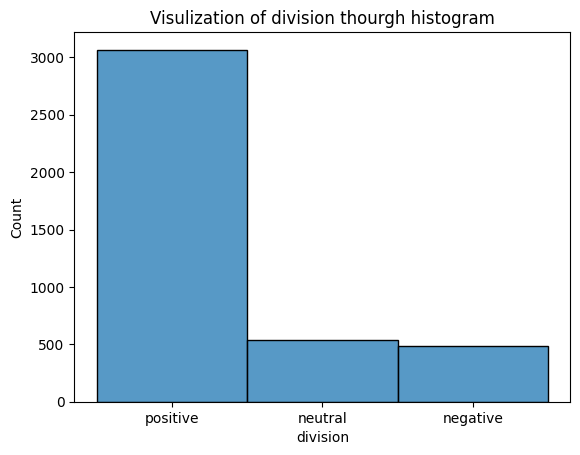

In [9]:
#Visulization thourgh histogram for sentiment ratio 
from matplotlib import pyplot as plt
import seaborn as sns 
sns.histplot(x=data["division"])
plt.title("Visulization of division thourgh histogram")
plt.show()

In [10]:
#nltk : natural language toolkit popular library used for working with human language data 
import nltk
#punkt : it is pre-trained model for sentence tokkenization specifically designed for english text
nltk.download('punkt')
#nltk.download()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
# Stopword Removal
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["review"].apply(lambda text: remove_stopwords(text))
data

,review,division
0,able play youtube alexa,positive
1,able recognize indian accent really well drop ...,positive
2,absolute smart device amazon connect external ...,positive
3,absolutely amaze new member family control hom...,positive
4,absolutely amaze previously sceptical invest m...,positive
...,...,...
4079,yo yo yo love go if want one smart speaker val...,positive
4080,youtube music,neutral
4081,youtube support nahi kartasong recognise achha...,neutral
4082,yup proscontrols wipro light amazinglysony bra...,neutral


In [13]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

data['review'].apply(lambda x: tokenization(x.lower()))
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Admin\AppData\Local\Temp\ipykernel_67528\2110911776.py:2: SyntaxWarning: invalid escape sequence '\W'
  text = re.split('\W+', text)


,review,division
0,able play youtube alexa,positive
1,able recognize indian accent really well drop ...,positive
2,absolute smart device amazon connect external ...,positive
3,absolutely amaze new member family control hom...,positive
4,absolutely amaze previously sceptical invest m...,positive


In [14]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

wordNet = WordNetLemmatizer()
def lemmatizer(text):
   text = [wordNet.lemmatize(word) for word in text]
   return text

data['review'].apply(lambda x: lemmatizer(x))
data.head()

In [15]:
x = data["review"] 
y = data["division"]

In [16]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.2,random_state= 42)

In [17]:
x_train.shape

(3267,)

In [18]:
y_train.shape

(3267,)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x_train_vectors = vectorizer.fit_transform(x_train)
x_test_vectors = vectorizer.transform(x_test)


In [20]:
x_train_vectors

<3267x4430 sparse matrix of type '<class 'numpy.float64'>'
	with 32532 stored elements in Compressed Sparse Row format>

In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [22]:
x_train_vectors = x_train_vectors.toarray()


In [23]:
x_test_vectors = x_test_vectors.toarray()


In [24]:
# fitting the model
nb_model = nb.fit(x_train_vectors,y_train)  
nb_model

GaussianNB()

In [25]:
#build svm model with linear kernal 
from sklearn.svm import SVC
svm_model = SVC()  # Adjust kernel for different SVM configurations
svm_model = svm_model.fit(x_train_vectors, y_train)
svm_model

SVC()

In [26]:
from sklearn.metrics import accuracy_score,f1_score
nb_predictions = nb_model.predict(x_test_vectors)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')  # Weighted F1 for multiclass


In [27]:
svm_predictions = svm_model.predict(x_test_vectors)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')  # Weighted F1 for multiclass


In [28]:
print("Naive Bayes Accuracy:", nb_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Naive Bayes F1 Score:", nb_f1)
print("SVM F1 Score:", svm_f1)


Naive Bayes Accuracy: 0.5042839657282742
SVM Accuracy: 0.8127294981640147
Naive Bayes F1 Score: 0.549232494317937
SVM F1 Score: 0.7795718599905755


In [29]:
new_tweet = "I am very happy becuase of alexa, alexa helps me alot"
new_tweet_vector = vectorizer.transform([(new_tweet)])
new_tweet_vector = new_tweet_vector.toarray()

nb_prediction = nb_model.predict(new_tweet_vector)[0]
svm_prediction = svm_model.predict(new_tweet_vector)[0]

print("Naive Bayes Prediction:", nb_prediction)
print("SVM Prediction:", svm_prediction)

Naive Bayes Prediction: positive
SVM Prediction: positive
